**`sklearn.neighbors`** provides functionality for unsupervised and supervised neighbors-based learning methods. Unsupervised nearest neighbors is the foundation of many other learning methods, notably manifold learning and spectral clustering. Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.<br>

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a **`Ball Tree`** or **`KD Tree`**).
<br><br>

The classes in `sklearn.neighbors` can handle either `NumPy` arrays or `scipy.sparse matrices` as input. For dense matrices, a large number of possible distance metrics are supported. For `sparse matrices`, arbitrary Minkowski metrics are supported for searches.



#Nearest Neighbors Classification

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

---

scikit-learn implements two different nearest neighbors classifiers: **`KNeighborsClassifier`** implements learning based on the $k$
nearest neighbors of each query point, where $k$
is an integer value specified by the user. **`RadiusNeighborsClassifier`** implements learning based on the number of neighbors within a fixed radius $r$
of each training point, where $r$
is a floating-point value specified by the user.<br><br>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Scikit-learn - for machine learning
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
#loading data

iris = load_iris()

X = iris.data

y = iris.target


print(f"Feature names: {iris.feature_names}")
print(f"Target names: {iris.target_names}")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target_names[y]

df.head(10)



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [ ]:
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


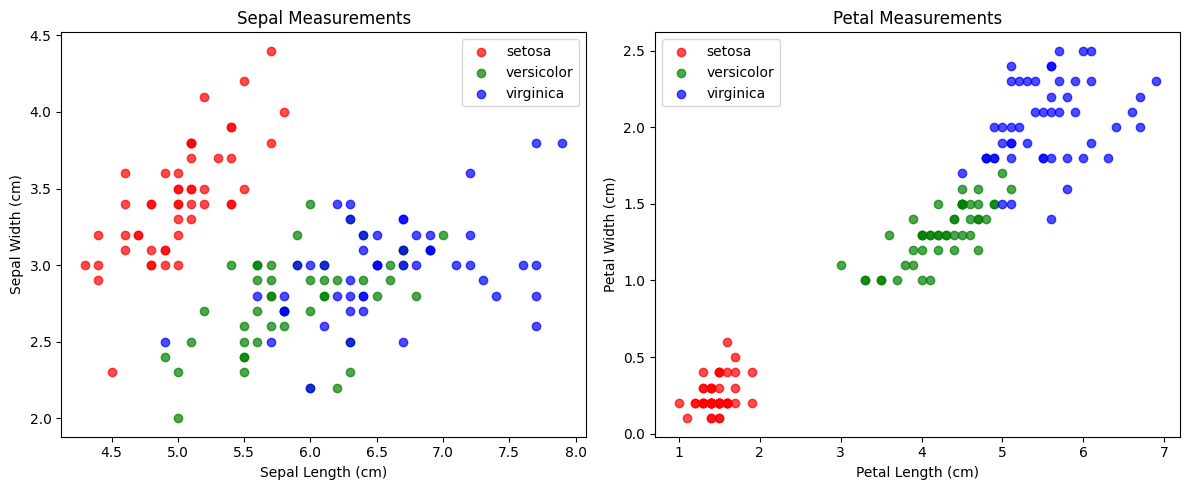

✅ Visualization created!


In [ ]:
# Create a scatter plot to see our data
plt.figure(figsize=(12, 5))

# Plot 1: Sepal measurements
plt.subplot(1, 2, 1)
colors = ['red', 'green', 'blue']
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 0], X[mask, 1],
                c=colors[i], label=species, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Measurements')
plt.legend()

# Plot 2: Petal measurements
plt.subplot(1, 2, 2)
for i, species in enumerate(iris.target_names):
    mask = y == i
    plt.scatter(X[mask, 2], X[mask, 3],
                c=colors[i], label=species, alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Measurements')
plt.legend()

plt.tight_layout()
plt.savefig('iris_visualization.png')
plt.show()

print("✅ Visualization created!")

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))

120
30


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

knn

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

for i in range(len(y_pred)):
  pred_name = iris.target_names[y_pred[i]]
  actual_name = iris.target_names[y_test[i]]


  if pred_name == actual_name:
    print(f"Predicted: {pred_name}, Actual: {actual_name}")
  else:
    print("Incorrect prediction")

Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: setosa, Actual: setosa
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: versicolor, Actual: versicolor
Predicted: versicolor, Actual: versicolor
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: setosa, Actual: setosa
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: virginica
Predicted: virginica, Actual: 

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{cm}")

print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



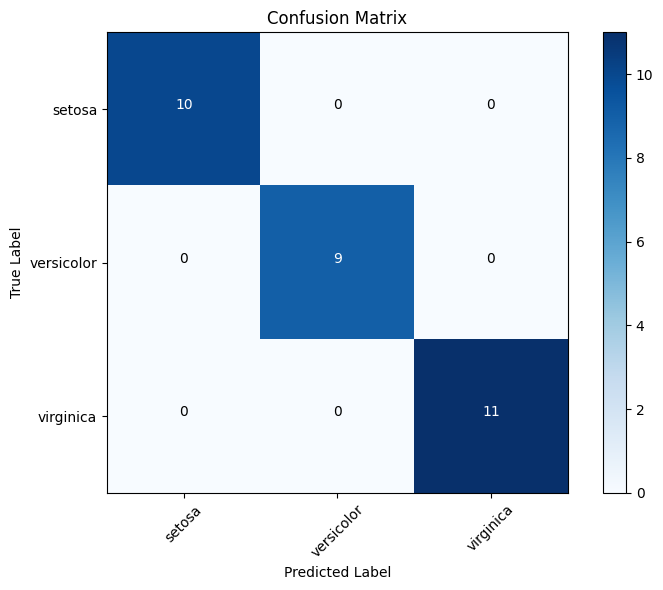

In [ ]:
# Create a nice confusion matrix visualization
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

# Add numbers to the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i, j]),
                horizontalalignment="center",
                color="white" if cm[i, j] > cm.max()/2 else "black")

plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

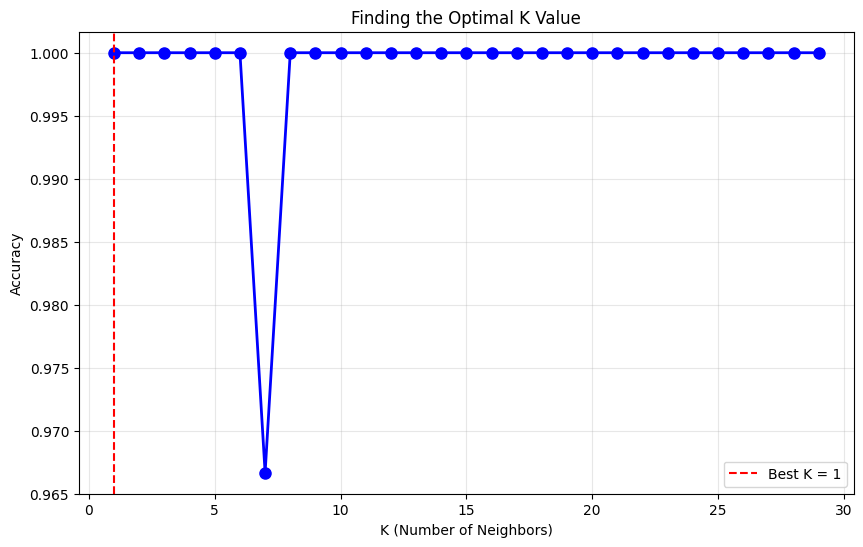

In [ ]:
# Find the best k-valus

k_values = range(1, 30)
accuracies = []


for k in (k_values):
  knn_temp = KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(X_train, y_train)
  y_pred = knn_temp.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracies.append(accuracy)


#find best k

best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)

# Plot K vs Accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=best_k, color='r', linestyle='--', label=f'Best K = {best_k}')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Finding the Optimal K Value')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('best_k_value.png')
plt.show()

In [ ]:
# Let's predict a new flower!
print("\n🌺 PREDICTING A NEW FLOWER")
print("=" * 50)

# New flower measurements
new_flower = [[5.1, 3.5, 1.4, 0.2]]  # Example measurements

# Make prediction
prediction = knn.predict(new_flower)
predicted_species = iris.target_names[prediction[0]]

print(f"Measurements: {new_flower[0]}")
print(f"  - Sepal Length: {new_flower[0][0]} cm")
print(f"  - Sepal Width:  {new_flower[0][1]} cm")
print(f"  - Petal Length: {new_flower[0][2]} cm")
print(f"  - Petal Width:  {new_flower[0][3]} cm")
print(f"\n🎯 Predicted Species: {predicted_species}")

# Get probability for each class
proba = knn.predict_proba(new_flower)
print("\n📊 Confidence for each species:")
for i, species in enumerate(iris.target_names):
    print(f"  {species}: {proba[0][i] * 100:.1f}%")


🌺 PREDICTING A NEW FLOWER
Measurements: [5.1, 3.5, 1.4, 0.2]
  - Sepal Length: 5.1 cm
  - Sepal Width:  3.5 cm
  - Petal Length: 1.4 cm
  - Petal Width:  0.2 cm

🎯 Predicted Species: setosa

📊 Confidence for each species:
  setosa: 100.0%
  versicolor: 0.0%
  virginica: 0.0%


#Nearest Neighbors Regression

Neighbors-based regression can be used in cases where the data labels are continuous rather than discrete variables. The label assigned to a query point is computed based on the mean of the labels of its nearest neighbors.

scikit-learn implements two different neighbors regressors: KNeighborsRegressor implements learning based on the $k$
nearest neighbors of each query point, where $k$
is an integer value specified by the user. RadiusNeighborsRegressor implements learning based on the neighbors within a fixed radius $r$
of the query point, where $r$ is a floating-point value specified by the user.

The basic nearest neighbors regression uses uniform weights: that is, each point in the local neighborhood contributes uniformly to the classification of a query point. Under some circumstances, it can be advantageous to weight points such that nearby points contribute more to the regression than faraway points. This can be accomplished through the weights keyword. The default value, `weights = 'uniform'`, assigns equal weights to all points.` weights = 'distance'` assigns weights proportional to the inverse of the distance from the query point. Alternatively, a user-defined function of the distance can be supplied, which will be used to compute the weights.

In [24]:
# Install if needed
# pip install numpy pandas matplotlib scikit-learn seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Set style for nice plots
plt.style.use('seaborn-v0_8-whitegrid')

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


In [25]:
housing = fetch_california_housing()

df  = pd.DataFrame(housing.data, columns=housing.feature_names)
df['Price'] = housing.target

In [6]:
for i, name in enumerate(housing.feature_names):
  print(f"{i}.{name}")

0.MedInc
1.HouseAge
2.AveRooms
3.AveBedrms
4.Population
5.AveOccup
6.Latitude
7.Longitude


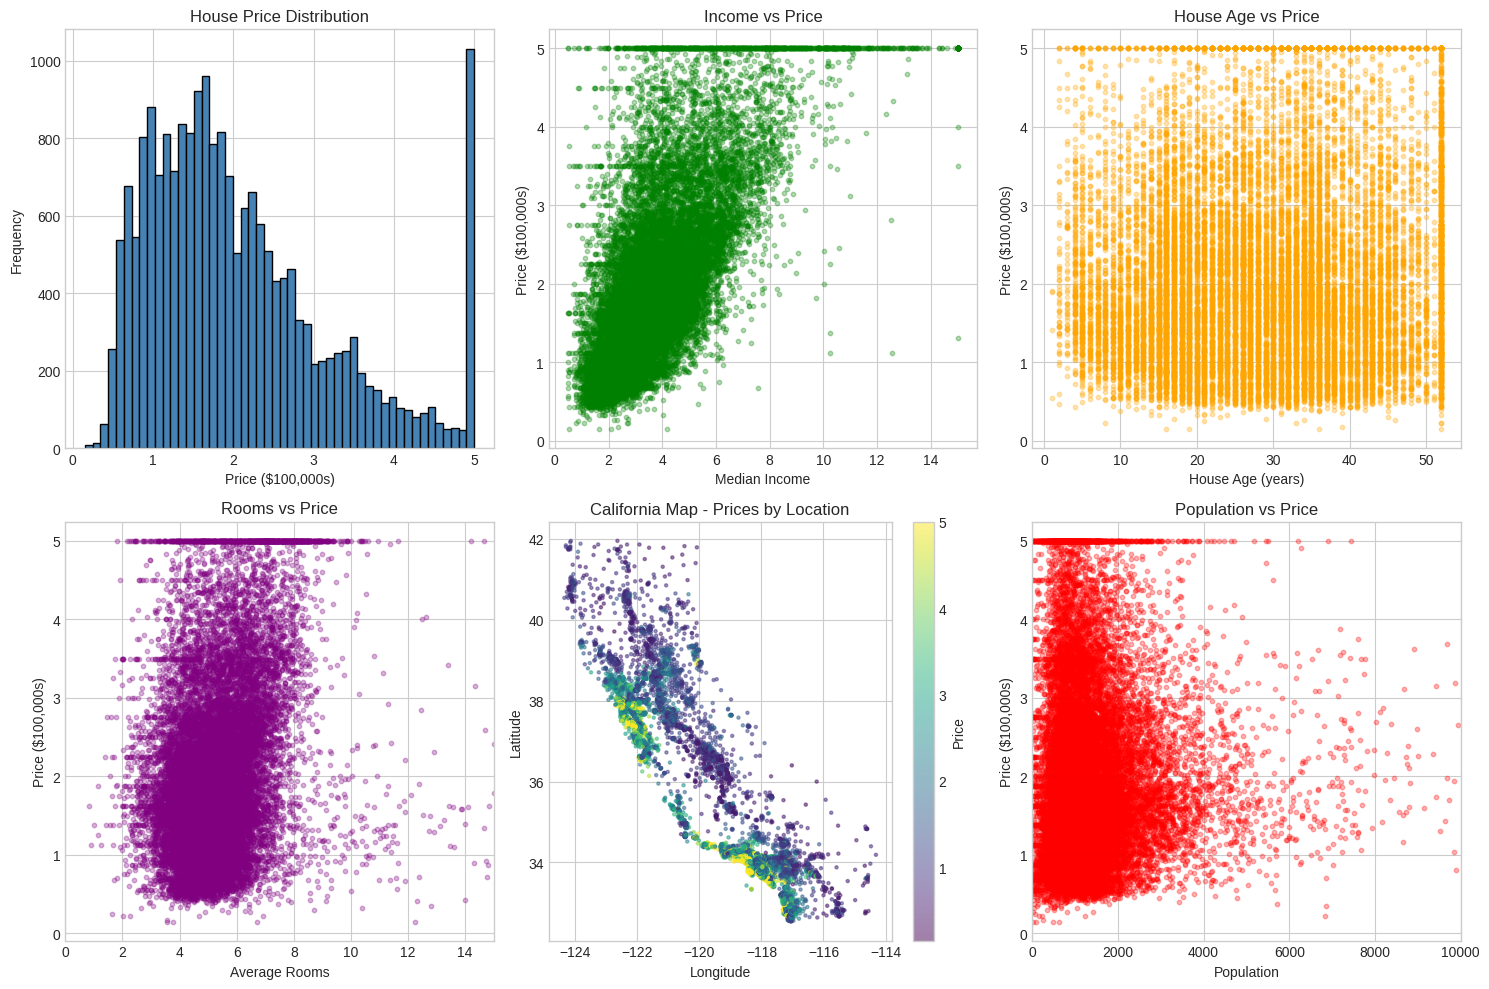

✅ Visualizations created!


In [7]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))X

# Plot 1: Price Distribution
axes[0, 0].hist(df['Price'], bins=50, color='steelblue', edgecolor='black')
axes[0, 0].set_xlabel('Price ($100,000s)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('House Price Distribution')

# Plot 2: Income vs Price (should show strong correlation!)
axes[0, 1].scatter(df['MedInc'], df['Price'], alpha=0.3, color='green', s=10)
axes[0, 1].set_xlabel('Median Income')
axes[0, 1].set_ylabel('Price ($100,000s)')
axes[0, 1].set_title('Income vs Price')

# Plot 3: House Age vs Price
axes[0, 2].scatter(df['HouseAge'], df['Price'], alpha=0.3, color='orange', s=10)
axes[0, 2].set_xlabel('House Age (years)')
axes[0, 2].set_ylabel('Price ($100,000s)')
axes[0, 2].set_title('House Age vs Price')

# Plot 4: Average Rooms vs Price
axes[1, 0].scatter(df['AveRooms'], df['Price'], alpha=0.3, color='purple', s=10)
axes[1, 0].set_xlabel('Average Rooms')
axes[1, 0].set_ylabel('Price ($100,000s)')
axes[1, 0].set_title('Rooms vs Price')
axes[1, 0].set_xlim(0, 15)  # Remove outliers from view

# Plot 5: Geographic visualization
scatter = axes[1, 1].scatter(df['Longitude'], df['Latitude'],
                              c=df['Price'], cmap='viridis',
                              alpha=0.5, s=5)
axes[1, 1].set_xlabel('Longitude')
axes[1, 1].set_ylabel('Latitude')
axes[1, 1].set_title('California Map - Prices by Location')
plt.colorbar(scatter, ax=axes[1, 1], label='Price')

# Plot 6: Population vs Price
axes[1, 2].scatter(df['Population'], df['Price'], alpha=0.3, color='red', s=10)
axes[1, 2].set_xlabel('Population')
axes[1, 2].set_ylabel('Price ($100,000s)')
axes[1, 2].set_title('Population vs Price')
axes[1, 2].set_xlim(0, 10000)

plt.tight_layout()
plt.savefig('housing_exploration.png', dpi=150)
plt.show()

print("✅ Visualizations created!")

In [5]:
correlations = df.corr()['Price'].drop('Price').sort_values(ascending=False)

for feature, corr in correlations.items():
    bar = "█" * int(abs(corr) * 20)
    sign = "+" if corr > 0 else "-"
    print(f"{feature:12} {sign}{abs(corr):.3f} {bar}")

MedInc       +0.688 █████████████
AveRooms     +0.152 ███
HouseAge     +0.106 ██
AveOccup     -0.024 
Population   -0.025 
Longitude    -0.046 
AveBedrms    -0.047 
Latitude     -0.144 ██


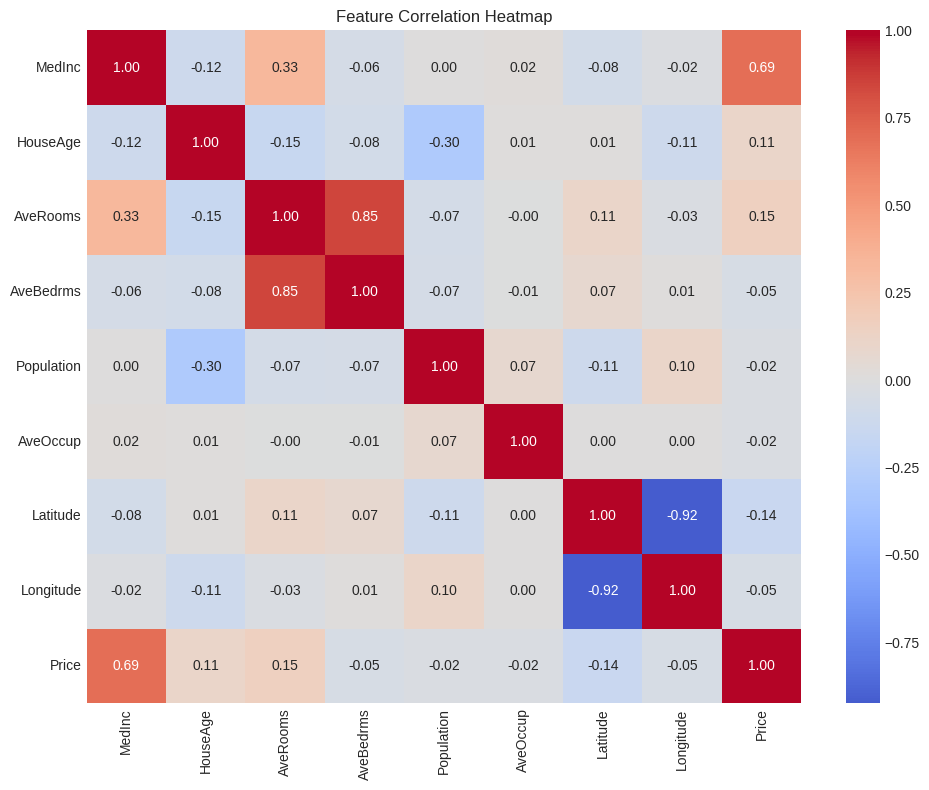

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
plt.show()

In [26]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [28]:
# Predict on test data
y_pred = knn_model.predict(X_test_scaled)

# Show some predictions
print("\n🔮 SAMPLE PREDICTIONS")
print("=" * 70)
print(f"{'Index':<8} {'Predicted':>15} {'Actual':>15} {'Difference':>15} {'Error%':>10}")
print("-" * 70)

for i in range(15):
    pred = y_pred[i] * 100000      # Convert to dollars
    actual = y_test.iloc[i] * 100000
    diff = pred - actual
    error_pct = abs(diff / actual) * 100

    status = "✓" if error_pct < 20 else "✗"
    print(f"{i:<8} ${pred:>12,.0f} ${actual:>13,.0f} ${diff:>+13,.0f} {error_pct:>8.1f}% {status}")

print("-" * 70)


🔮 SAMPLE PREDICTIONS
Index          Predicted          Actual      Difference     Error%
----------------------------------------------------------------------
0        $      49,880 $       47,700 $       +2,180      4.6% ✓
1        $      76,460 $       45,800 $      +30,660     66.9% ✗
2        $     475,001 $      500,001 $      -25,000      5.0% ✓
3        $     287,660 $      218,600 $      +69,060     31.6% ✗
4        $     272,620 $      278,000 $       -5,380      1.9% ✓
5        $     177,860 $      158,700 $      +19,160     12.1% ✓
6        $     271,820 $      198,200 $      +73,620     37.1% ✗
7        $     192,460 $      157,500 $      +34,960     22.2% ✗
8        $     203,140 $      340,000 $     -136,860     40.3% ✗
9        $     495,561 $      446,600 $      +48,961     11.0% ✓
10       $     125,180 $      123,200 $       +1,980      1.6% ✓
11       $     171,360 $      253,900 $      -82,540     32.5% ✗
12       $     180,220 $      215,100 $      -34,880     16

In [14]:
# Calculate evaluation metrics
print("\n📊 MODEL EVALUATION")
print("=" * 60)

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"\n📏 Mean Absolute Error (MAE): ${mae * 100000:,.0f}")
print(f"   → Predictions are off by ~${mae * 100000:,.0f} on average")

# Root Mean Squared Error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"\n📐 Root Mean Squared Error (RMSE): ${rmse * 100000:,.0f}")

# R² Score
r2 = r2_score(y_test, y_pred)
print(f"\n📈 R² Score: {r2:.4f}")
print(f"   → Model explains {r2 * 100:.1f}% of price variation")

# Mean Absolute Percentage Error
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"\n📊 Mean Absolute Percentage Error: {mape:.2f}%")

# Summary
print("\n" + "=" * 60)
print("📋 SUMMARY")
print("=" * 60)
if r2 > 0.7:
    print("🎉 Great! The model has GOOD predictive power!")
elif r2 > 0.5:
    print("👍 Decent! The model has MODERATE predictive power.")
else:
    print("⚠️ The model needs improvement.")


📊 MODEL EVALUATION

📏 Mean Absolute Error (MAE): $44,615
   → Predictions are off by ~$44,615 on average

📐 Root Mean Squared Error (RMSE): $65,759

📈 R² Score: 0.6700
   → Model explains 67.0% of price variation

📊 Mean Absolute Percentage Error: 24.67%

📋 SUMMARY
👍 Decent! The model has MODERATE predictive power.


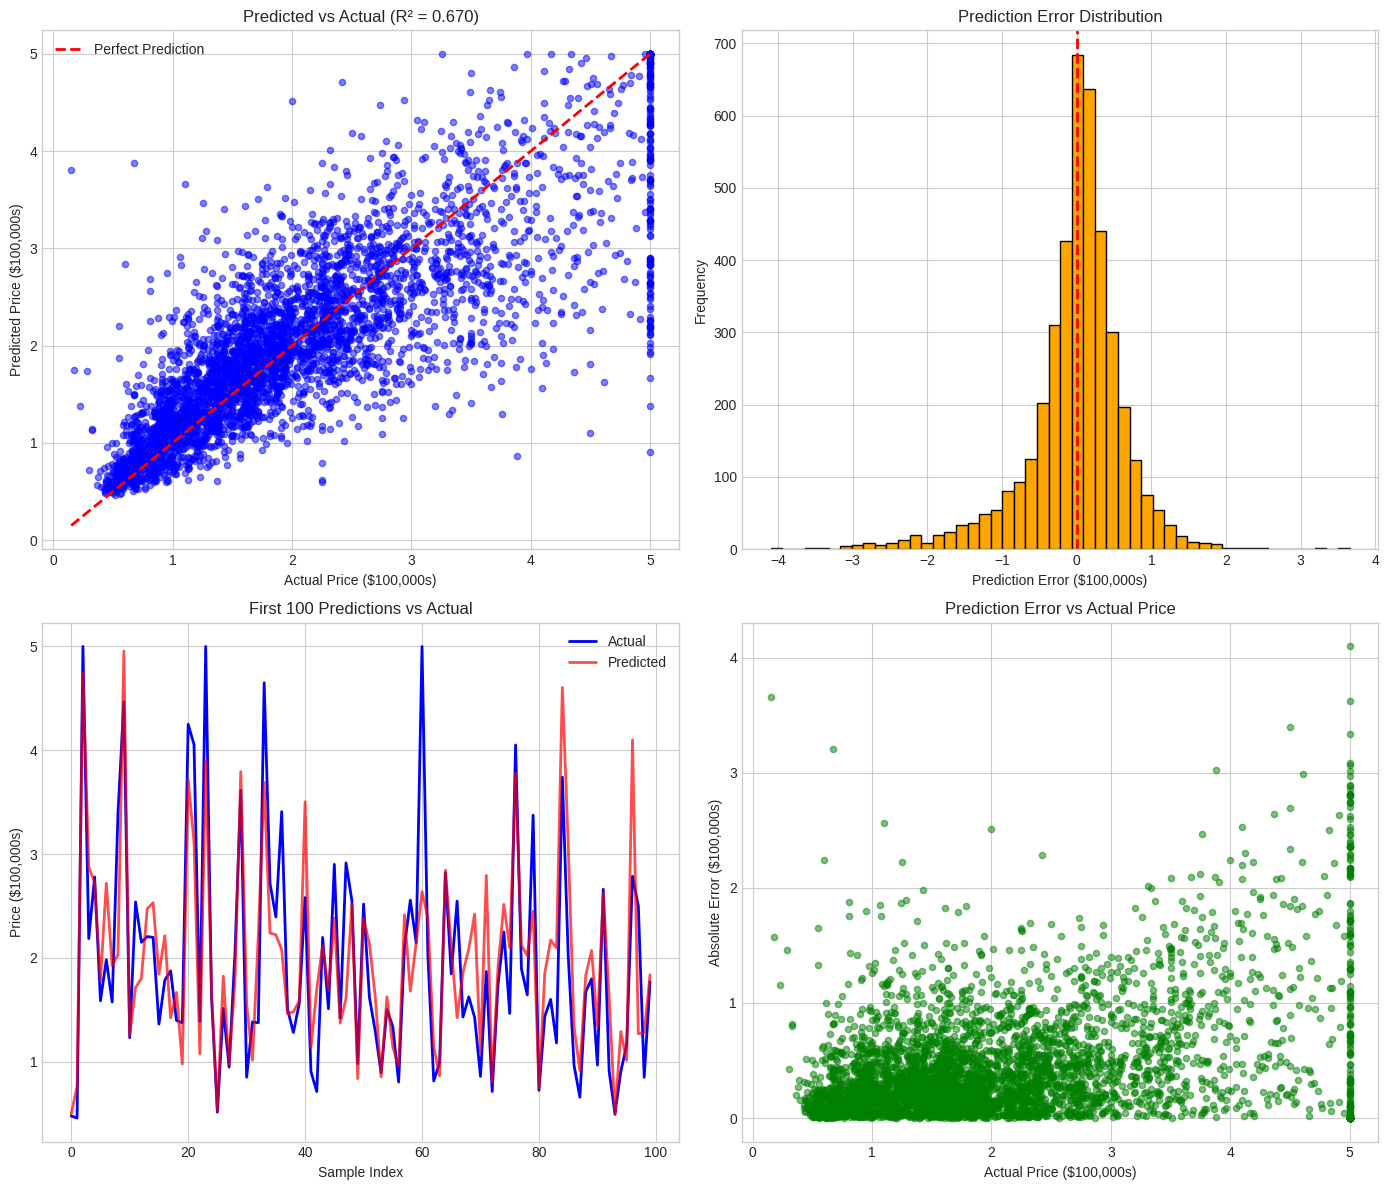

✅ Prediction visualizations created!


In [15]:
# Create comprehensive prediction visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Predicted vs Actual (Scatter)
axes[0, 0].scatter(y_test, y_pred, alpha=0.5, color='blue', s=20)
axes[0, 0].plot([y_test.min(), y_test.max()],
                [y_test.min(), y_test.max()],
                'r--', linewidth=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Actual Price ($100,000s)')
axes[0, 0].set_ylabel('Predicted Price ($100,000s)')
axes[0, 0].set_title(f'Predicted vs Actual (R² = {r2:.3f})')
axes[0, 0].legend()

# Plot 2: Prediction Errors Distribution
errors = y_pred - y_test
axes[0, 1].hist(errors, bins=50, color='orange', edgecolor='black')
axes[0, 1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0, 1].set_xlabel('Prediction Error ($100,000s)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Prediction Error Distribution')

# Plot 3: First 100 predictions comparison
sample_size = 100
x_axis = range(sample_size)
axes[1, 0].plot(x_axis, y_test.iloc[:sample_size].values,
                label='Actual', color='blue', linewidth=2)
axes[1, 0].plot(x_axis, y_pred[:sample_size],
                label='Predicted', color='red', linewidth=2, alpha=0.7)
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Price ($100,000s)')
axes[1, 0].set_title('First 100 Predictions vs Actual')
axes[1, 0].legend()

# Plot 4: Error by actual price
axes[1, 1].scatter(y_test, np.abs(errors), alpha=0.5, color='green', s=20)
axes[1, 1].set_xlabel('Actual Price ($100,000s)')
axes[1, 1].set_ylabel('Absolute Error ($100,000s)')
axes[1, 1].set_title('Prediction Error vs Actual Price')

plt.tight_layout()
plt.savefig('prediction_analysis.png', dpi=150)
plt.show()

print("✅ Prediction visualizations created!")

In [8]:
k_range = range(1, 51)

mae_scores = []
rmse_scores = []
r2_scores = []

for k in k_range:
    knn_model_temp = KNeighborsRegressor(n_neighbors=k)
    knn_model_temp.fit(X_train_scaled, y_train)

    y_pred_temp = knn_model_temp.predict(X_test_scaled)


    mae_scores.append(mean_absolute_error(y_test, y_pred_temp) * 100000)
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_temp)) * 100000)
    r2_scores.append(r2_score(y_test, y_pred_temp))




In [11]:
best_k = k_range[np.argmin(mae_scores)]
best_mae = min(mae_scores)

print(f"Best K Value: {best_k}")
print(f"Best Mean Absolute Error:" , best_mae)

Best K Value: 13
Best Mean Absolute Error: 43730.25245974955


In [13]:
best_k_mae = k_range[np.argmin(mae_scores)]
best_k_r2 = k_range[np.argmax(r2_scores)]

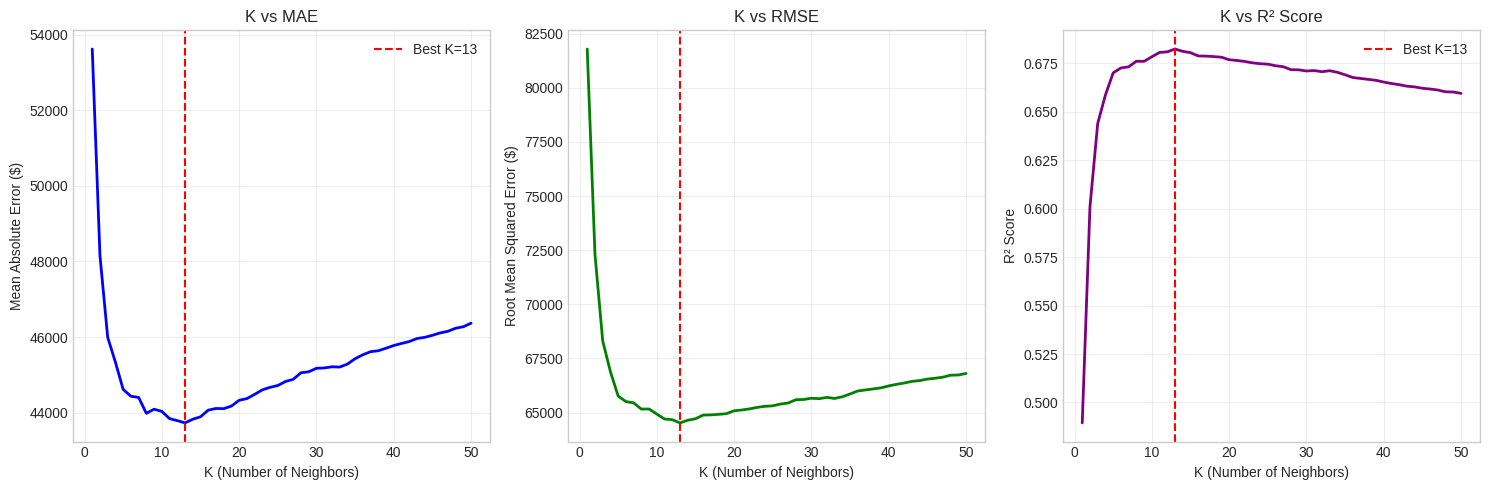

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MAE vs K
axes[0].plot(k_range, mae_scores, 'b-', linewidth=2)
axes[0].axvline(x=best_k_mae, color='red', linestyle='--',
                label=f'Best K={best_k_mae}')
axes[0].set_xlabel('K (Number of Neighbors)')
axes[0].set_ylabel('Mean Absolute Error ($)')
axes[0].set_title('K vs MAE')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# RMSE vs K
axes[1].plot(k_range, rmse_scores, 'g-', linewidth=2)
axes[1].axvline(x=best_k_mae, color='red', linestyle='--')
axes[1].set_xlabel('K (Number of Neighbors)')
axes[1].set_ylabel('Root Mean Squared Error ($)')
axes[1].set_title('K vs RMSE')
axes[1].grid(True, alpha=0.3)

# R² vs K
axes[2].plot(k_range, r2_scores, 'purple', linewidth=2)
axes[2].axvline(x=best_k_r2, color='red', linestyle='--',
                label=f'Best K={best_k_r2}')
axes[2].set_xlabel('K (Number of Neighbors)')
axes[2].set_ylabel('R² Score')
axes[2].set_title('K vs R² Score')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('optimal_k_search.png', dpi=150)
plt.show()

#Feature Importance Analysis

In [19]:
fearure_importance = []

for feature in X.columns:
  X_test_modified = X_test.copy()

  X_test_modified[feature] = np.random.permutation(X_test_modified[feature].values)

  X_test_modified_scaled = scaler.transform(X_test_modified)

  original_mae = mean_absolute_error(y_test, y_pred)
  modified_mae = mean_absolute_error(y_test, y_pre)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20046,1.6812,25.0,4.192201,1.022284,1392.0,3.877437,36.06,-119.01
3024,2.5313,30.0,5.039384,1.193493,1565.0,2.679795,35.14,-119.46
15663,3.4801,52.0,3.977155,1.185877,1310.0,1.360332,37.80,-122.44
20484,5.7376,17.0,6.163636,1.020202,1705.0,3.444444,34.28,-118.72
9814,3.7250,34.0,5.492991,1.028037,1063.0,2.483645,36.62,-121.93
...,...,...,...,...,...,...,...,...
15362,4.6050,16.0,7.002212,1.066372,1351.0,2.988938,33.36,-117.22
16623,2.7266,28.0,6.131915,1.256738,1650.0,2.340426,35.36,-120.83
18086,9.2298,25.0,7.237676,0.947183,1585.0,2.790493,37.31,-122.05
2144,2.7850,36.0,5.289030,0.983122,1227.0,2.588608,36.77,-119.76



🔍 FEATURE IMPORTANCE ANALYSIS

📊 Feature Importance (higher = more important):
----------------------------------------
MedInc       0.5182 ███████████████████████████████████████████████████████████████████████████████████████████████████████
Latitude     0.2884 █████████████████████████████████████████████████████████
Longitude    0.2623 ████████████████████████████████████████████████████
HouseAge     0.0760 ███████████████
AveRooms     0.0683 █████████████
AveBedrms    0.0277 █████
Population   0.0240 ████
AveOccup     0.0196 ███


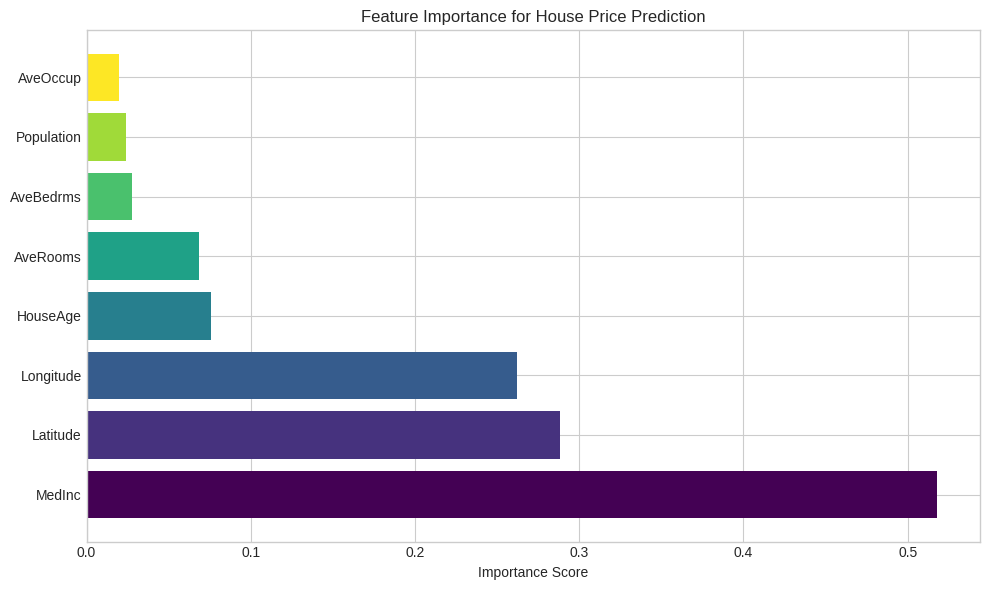

In [29]:
# Understand which features matter most
print("\n🔍 FEATURE IMPORTANCE ANALYSIS")
print("=" * 60)

# Method: Check how predictions change when we modify each feature
feature_importance = []

for feature in X.columns:
    # Create a copy of test data
    X_test_modified = X_test.copy()

    # Shuffle one feature (break its relationship with target)
    X_test_modified[feature] = np.random.permutation(X_test_modified[feature].values)

    # Scale and predict
    X_modified_scaled = scaler.transform(X_test_modified)
    y_pred_modified = knn_model.predict(X_modified_scaled)

    # Calculate how much worse the prediction became
    original_mae = mean_absolute_error(y_test, y_pred)
    modified_mae = mean_absolute_error(y_test, y_pred_modified)
    importance = modified_mae - original_mae

    feature_importance.append({
        'Feature': feature,
        'Importance': importance
    })

# Sort by importance
importance_df = pd.DataFrame(feature_importance)
importance_df = importance_df.sort_values('Importance', ascending=False)

print("\n📊 Feature Importance (higher = more important):")
print("-" * 40)
for _, row in importance_df.iterrows():
    bar = "█" * int(row['Importance'] * 200)
    print(f"{row['Feature']:12} {row['Importance']:.4f} {bar}")

# Visualize
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(importance_df)))
plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.xlabel('Importance Score')
plt.title('Feature Importance for House Price Prediction')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=150)
plt.show()

📥 Loading Olivetti Faces Dataset...
downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
✅ Loaded 400 face images (64x64 pixels)
📊 Training: 320 | Testing: 80

🔍 Finding optimal K...
   K=1: MSE=0.012435
   K=3: MSE=0.009689
   K=5: MSE=0.010401
   K=7: MSE=0.010813
   K=10: MSE=0.011558
   K=15: MSE=0.012548
   K=20: MSE=0.013039
🏆 Best K = 3

📊 Final MSE: 0.009689


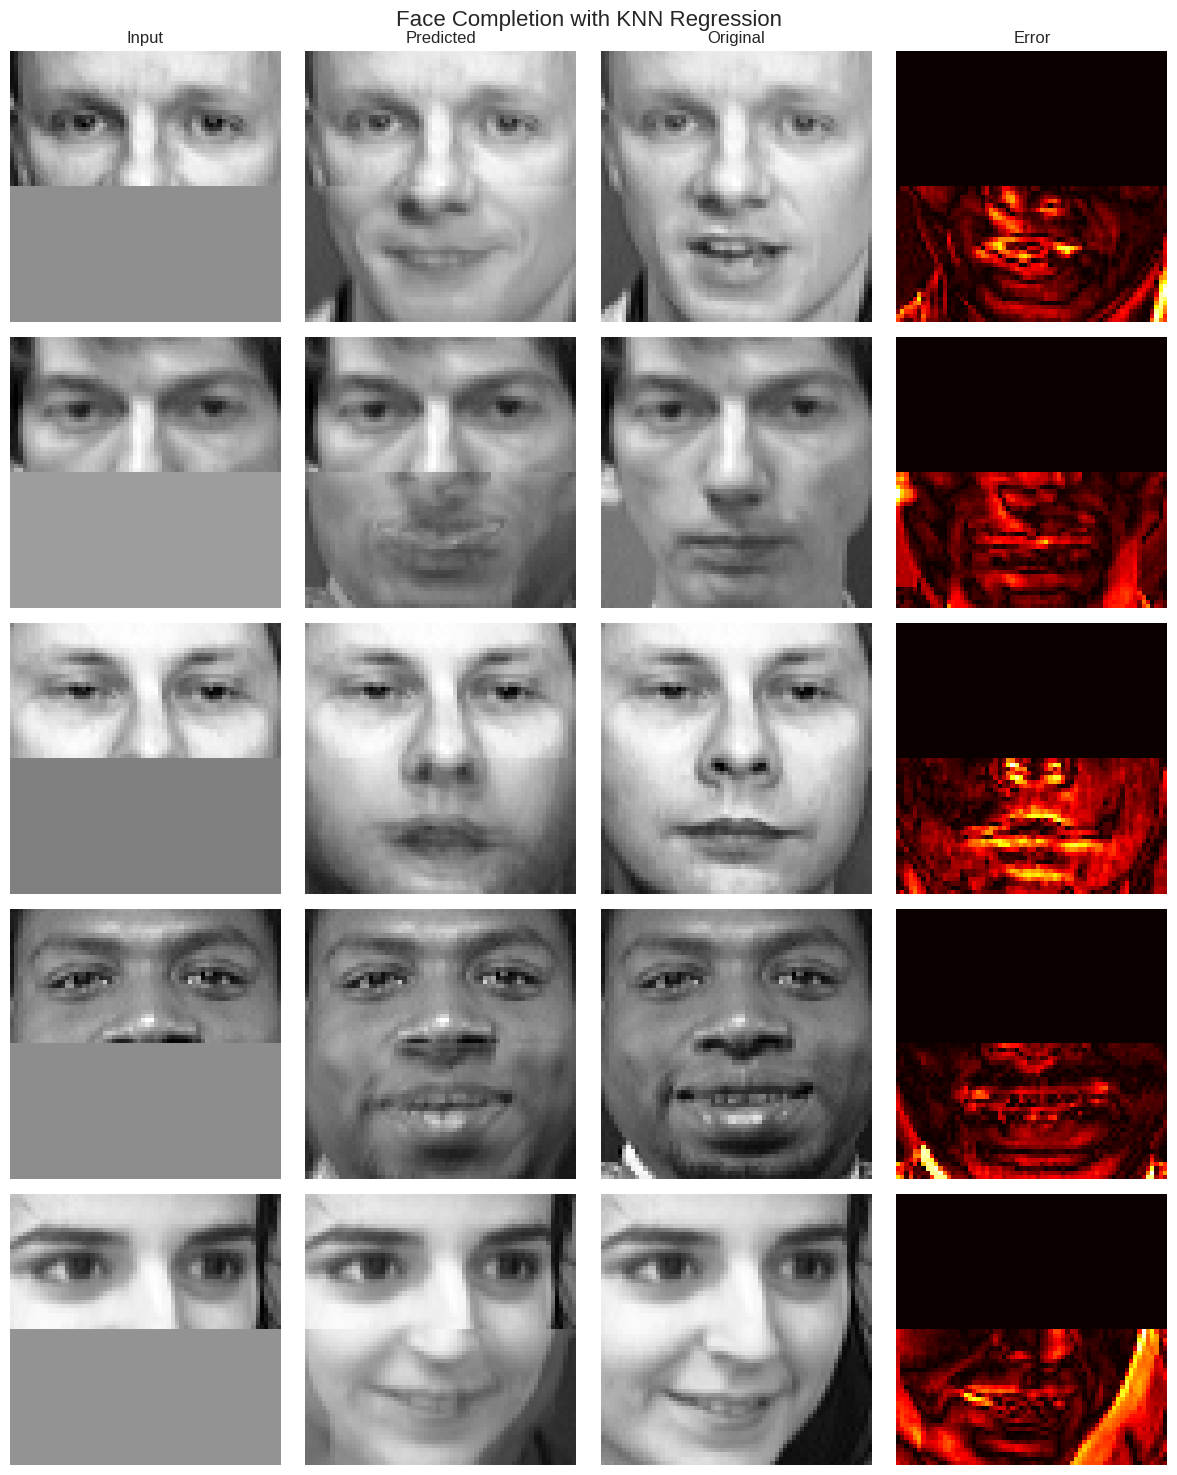


✅ Face completion project completed!


In [30]:
"""
Face Completion with KNN Regression
Predict missing parts of faces using K-Nearest Neighbors
"""

# ============================================
# IMPORTS
# ============================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(42)

# ============================================
# LOAD DATA
# ============================================
print("📥 Loading Olivetti Faces Dataset...")
faces = fetch_olivetti_faces()
X = faces.data
print(f"✅ Loaded {len(X)} face images (64x64 pixels)")

# ============================================
# PREPARE DATA
# ============================================
# Reshape to 64x64 images
images = X.reshape(400, 64, 64)

# Split into upper and lower halves
X_upper = images[:, :32, :].reshape(400, -1)  # Features
y_lower = images[:, 32:, :].reshape(400, -1)  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_upper, y_lower, test_size=0.2, random_state=42
)
print(f"📊 Training: {len(X_train)} | Testing: {len(X_test)}")

# ============================================
# FIND BEST K
# ============================================
print("\n🔍 Finding optimal K...")
best_k, best_mse = 1, float('inf')

for k in [1, 3, 5, 7, 10, 15, 20]:
    model = KNeighborsRegressor(n_neighbors=k, weights='distance')
    model.fit(X_train, y_train)
    mse = mean_squared_error(y_test, model.predict(X_test))
    print(f"   K={k}: MSE={mse:.6f}")
    if mse < best_mse:
        best_k, best_mse = k, mse

print(f"🏆 Best K = {best_k}")

# ============================================
# TRAIN FINAL MODEL
# ============================================
knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"\n📊 Final MSE: {mse:.6f}")

# ============================================
# VISUALIZE RESULTS
# ============================================
fig, axes = plt.subplots(5, 4, figsize=(12, 15))

for i in range(5):
    upper = X_test[i].reshape(32, 64)
    true_lower = y_test[i].reshape(32, 64)
    pred_lower = y_pred[i].reshape(32, 64)

    # Input
    input_face = np.ones((64, 64)) * 0.5
    input_face[:32, :] = upper
    axes[i, 0].imshow(input_face, cmap='gray')
    axes[i, 0].set_title('Input' if i == 0 else '')
    axes[i, 0].axis('off')

    # Predicted
    pred_face = np.zeros((64, 64))
    pred_face[:32, :] = upper
    pred_face[32:, :] = pred_lower
    axes[i, 1].imshow(pred_face, cmap='gray')
    axes[i, 1].set_title('Predicted' if i == 0 else '')
    axes[i, 1].axis('off')

    # Original
    orig_face = np.zeros((64, 64))
    orig_face[:32, :] = upper
    orig_face[32:, :] = true_lower
    axes[i, 2].imshow(orig_face, cmap='gray')
    axes[i, 2].set_title('Original' if i == 0 else '')
    axes[i, 2].axis('off')

    # Error
    error = np.zeros((64, 64))
    error[32:, :] = np.abs(pred_lower - true_lower)
    axes[i, 3].imshow(error, cmap='hot')
    axes[i, 3].set_title('Error' if i == 0 else '')
    axes[i, 3].axis('off')

plt.suptitle('Face Completion with KNN Regression', fontsize=16)
plt.tight_layout()
plt.savefig('face_completion_results.png', dpi=150)
plt.show()

print("\n✅ Face completion project completed!")